In [ ]:
# Importing necessary libraries and loading dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

dataset = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
dataset.shape

(4269, 13)

In [ ]:
# Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# Displaying First 5 Rows
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<Axes: xlabel=' loan_status', ylabel='count'>

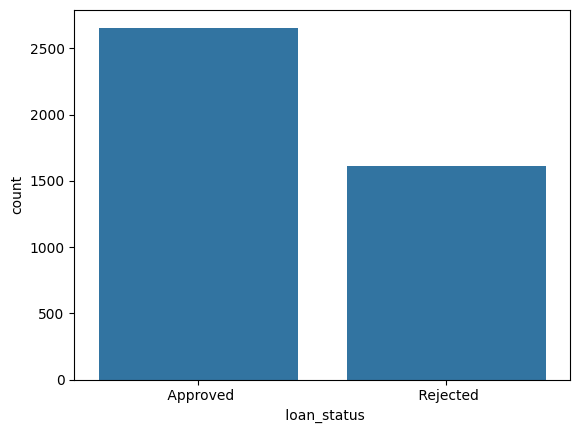

In [ ]:
# checking if data is balanced
sns.countplot(x =' loan_status', data=dataset)

In [ ]:
# Missing Data Analysis
dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
# Performing Label Encoding
dataset.drop(columns=['loan_id'], inplace=True)
dataset.columns = dataset.columns.str.strip()

dataset['education'] = dataset['education'].map({' Not Graduate':0, ' Graduate':1})
dataset['self_employed'] = dataset['self_employed'].map({' No':0, ' Yes':1})
dataset['loan_status'] = dataset['loan_status'].map({' Rejected':0, ' Approved':1})

dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
# Split the data into features (X) and target (y)
X = dataset.drop(columns=['loan_status'])
y = dataset['loan_status']

# Standarding the features using StandardScaler
columns = [ 'income_annum','cibil_score' ,'loan_term',
                      'residential_assets_value', 'commercial_assets_value',
                      'bank_asset_value']
sc = StandardScaler()
X[columns] = sc.fit_transform(X[columns])

X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,1.617979,29900000,0.192617,1.032792,-0.780058,2.877289,22700000,0.930304
1,0,0,1,-0.341750,12200000,-0.508091,-1.061051,-0.733924,-0.631921,8800000,-0.515936
2,3,1,0,1.439822,29700000,1.594031,-0.544840,-0.057300,-0.107818,33300000,2.407316
3,3,1,0,1.119139,30700000,-0.508091,-0.771045,1.649637,-0.381263,23300000,0.899533
4,5,0,1,1.689242,24200000,1.594031,-1.264055,0.757724,0.735304,29400000,0.007172
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,-1.446324,2300000,0.192617,-1.641063,-0.718546,-1.019301,3300000,-1.285213
4265,0,0,1,-0.626801,11300000,1.594031,-0.237434,-0.503257,-0.472412,11000000,-0.946732
4266,2,0,0,0.513405,23900000,1.243677,-0.829046,-0.964591,1.692361,18100000,0.714907
4267,1,0,0,-0.341750,12800000,-0.508091,1.044393,0.111856,-0.973727,14100000,0.253341


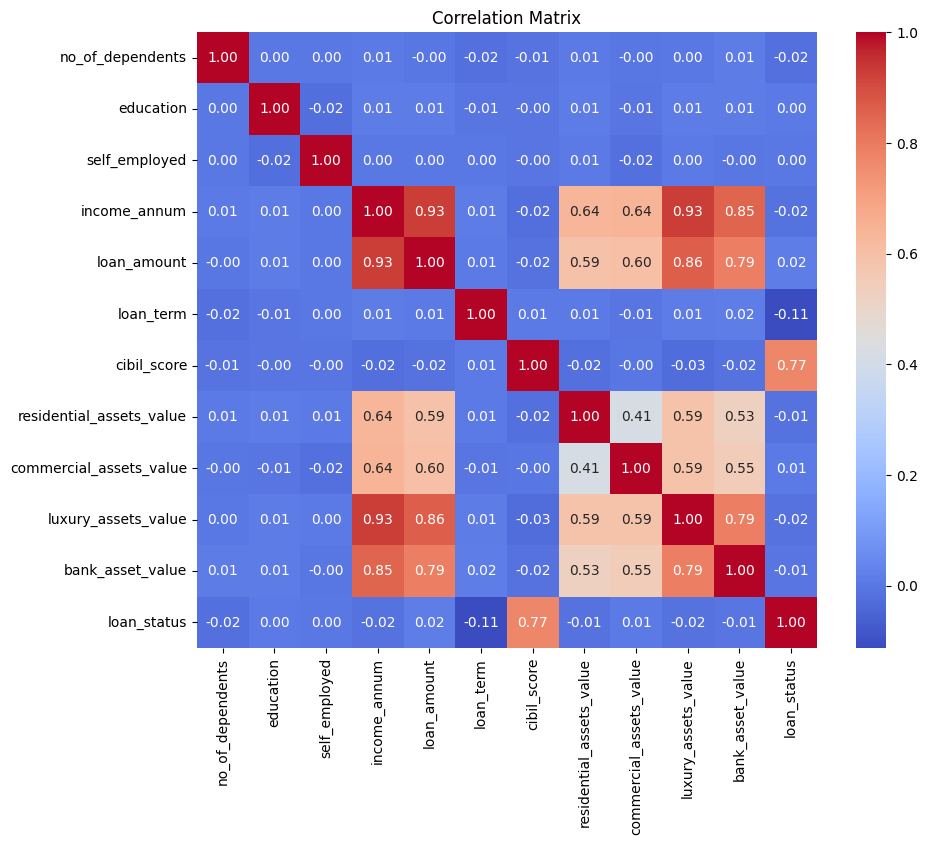

In [ ]:
# Correlation Analysis
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Feature Selection
features_drop = ['luxury_assets_value','loan_amount']
X = X.drop(features_drop, axis = 1)

In [ ]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:

#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

random_search = RandomizedSearchCV(
    estimator = classifier,
    param_distributions=param_grid,
    n_iter = 10,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:

#KNN
knn = KNeighborsClassifier(n_neighbors = 11, metric='euclidean', p = 1, weights = 'distance')
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


In [ ]:

#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator = classifier,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:

#random forest

classifier = RandomForestClassifier(n_estimators= 50, min_samples_split= 10, min_samples_leaf= 1, max_depth= 10, bootstrap= True)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


In [ ]:

#visualizing the first tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
features = ["no_of_dependents", "education", "self_employed", "income_annum", "loan_amount", "loan_term", "cibil_score", "residantals_assets_value", "commercial_assets_value", "luxury_assets_value", " bank_asset_value", "loan_status"]
plt.figure(figsize=(20, 25))
plot_tree(classifier.estimators_[0], feature_names=features, filled=True)
plt.show()


In [ ]:

#finding hyperparameters
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
classifier = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 1.0, 2.0]
}
random_search = RandomizedSearchCV(
    estimator = classifier,
    param_distributions = param_grid,
    n_iter=5,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:

#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C=1, gamma = 0.1, degree = 3, coef0 = 0.0, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
